<a href="https://colab.research.google.com/github/paulodowd/EMATM0054_53/blob/main/Labsheets/Supp/SL6_PlottingResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Results Help Sheet

This sheet is intended to help you process results collected from experiments. Importantly, **all the processing of your data can be done within Google Colab using Python** - meaning you do not need to install any software.   If you have Jupyter Notebooks installed, you should be able to use this code to work with files stored on your computer.  

In the code cells, I've tried to provide as much commenting to help as possible.  It is normal to refer to documentation and to search for advice online when something isn't working.  I've included links to the resources I used.  Whilst it can be a little time consuming to debug this python code, I still find this quicker in the long run than attempting to plot via Excel.

If you cannot find the type of plot that you want in this sheet, I recommend you take a look at <a href="https://seaborn.pydata.org/examples/index.html">the Seaborn gallery of examples</a>.

This sheet covers:

1. [Guidance: Formatting Results](#formatting)
2. [Hosting data online, to allow for processing in Google Colab](#hosting)
3. [Line Plots](#lineplots)
4. [Box Plots](#boxplots)
5. [Scatter Plots](#scatterplots)
6. [Polar Plots](#polarplots)

In this sheet the examples use fictional data from a fictional scenario. In our fictional experiment, a robot had 8 proximity sensors placed around it's body at the angular positions 0, 45, 90, 135, 180, 225, 270 and 315 degrees.  An illustration is below, with several sensors active simultaneously (marked in brighter red).  The sensors returned a relative `Measurement` value, and a self-determined `Accuracy` reading of the measurement.

<p align="center">
  <img src="https://github.com/paulodowd/PlottingGuidance/blob/main/images/robot_illustration.png?raw=true">
</p>


<br><br><br><br>

<a name="formatting"></a>
## Guidance on Formatting Results

If you can, it is best to automate the collection and formatting of your results from the program or robot you are using.  Otherwise it can take a lot of time to copy and paste data around.  When you do this, you can store your results in a `.csv` file, which can be opened by Excel or any text editor.  It is best to avoid Microsoft Word as this may add hidden characters to your file.  

In general, it is best to format your data so that every point is labelled by the variables of the experiment.  What this means is adding extra columns of data which state the appropriate experiment variable.  **An example is discussed below**.  Whilst this seems very redundant, later we can use ranges from the labels to select which data to include in a plot.  



Review the following table of results.  You can <a href="https://raw.githubusercontent.com/paulodowd/PlottingGuidance/main/fictional_results.csv">view the full results here</a> - and you should note that there are approximately 700 rows of data.  We have conducted many trials across different experiment configurations (variables) - e.g. multiple experiments on the same robotic system.  However, it is possible to have all the results identifiable within a single file.  This will help later in comparing different sets of results against each other.  The following is a small extract:


|Angle|Distance|Measurement|Accuracy |
|-----|--------|-----------|---------|
|0|20|170.5|49.46|
|0|20|152.5|47.13|
|0|20|162.7|48.73|
|0|20|171.9|47.99|
|0|20|155.3|41.84|
|0|20|166.8|41.71|
|0|20|165.9|48.33|
|0|20|160.4|49.14|
|0|20|169.6|50.54|
|0|20|166.4|52.91|
|0|35|141.9|46.43|
|0|35|154.8|45.83|
|0|35|148.8|47.06|
|0|35|148.8|48.3|
|0|35|155.3|45.1|
|0|35|164.5|54.34|
|0|35|160.4|43.97|
|0|35|144.2|47.6|
|0|35|156.2|45.43|
|0|35|169.1|49.05|
|0|50|124.9|36.9|
|0|50|106.9|43.97|
|0|50|140.6|43.93|
|0|50|141.5|47.23|
|0|50|137.8|39.13|
|0|50|125.8|41.76|
|0|50|123.5|41.79|
|0|50|155.8|46.45|
|0|50|114.7|39.76|
|0|50|132.7|37.85|
|0|65|117.1|35.83|
|0|65|107.4|38.2|
| . |  . | . | . | . |
| . |  . | . | . | . |

In our table above, column:
1. `angle` denotes which sensor (experiment variable)
2. `distance` is the distance from an obstacle that a reading was taken (experiment variable)
3. `measurement` is the sensor reading taken (result)
4. `accuracy` is the sensors own estimate of the accuracy of the measurement (result)

In the above extract, you can read the table rows to summarise that we have repeated measurements for a sensor at 0 degrees at distance 20.  For example, rows 1-10 have distance=0 and angle=20.  This is the 10 repeated trials for these experiment variables.

Later rows have entries for other combinations, such as `angle=315 and distance=20` We need these repeated measurements to plot not just the mean (which is very common) but also the distribution of the results (which is very useful and important!).

In your work, consider formatting your results into a similar table using columns with repeating values as labels to your actual measurements.

You should save your results (or export them) in a `.csv` file format, which stands for "comma seperated values".  You can open a `.csv` file with a text editor or Excel.  The content of the file for the above extract looks like:

```
Angle,Distance,Measurement,Accuracy
0,20,170.5,49.46
0,20,152.5,47.13
0,20,162.7,48.73
0,20,171.9,47.99
0,20,155.3,41.84
0,20,166.8,41.71
0,20,165.9,48.33
0,20,160.4,49.14
0,20,169.6,50.54
```
You can see that the first row contains a text header (names), whilst the remaining rows are numeric values seperated by comma.

Later, we will be able to select an exact range from all our data using a command like:

```
subset = Data[ ( (Data['Angle'] == 0) & (Data['Distance'] <= 80) ) ]
```

In the above, we take the subset of all data that fits the criteria of being the experiments where 'Angle' is equal to 0 degrees and the 'Distance' is less or equal to 80.  This is just an example, but should help to illustrate why this data formatting is useful.  



<br><br><br><br>

<a name="hosting"></a>
## Hosting Data Online

I have found GitHub to be the most convenient and reliable means to host my results.  To use results hosted on GitHub, you will need to make a public repository.  A private repository will not allow an external website such as Google Colab to access the results file.

Once you have created a repository and uploaded your results file (a `.csv` file is recommended), you must then click the `raw` button to access the file directly through your browser (indicated by the blue arrow below):<br>

<p align="center">
  <img src="https://github.com/paulodowd/PlottingGuidance/blob/main/images/click_raw.png?raw=true">
</p>
<br>

Once you have clicked the `raw` button, simply copy the web address URL from your browser window.  This is the path to your results that we will use within Google Colab.  For example, for this sheet, the web address URL of the data looks like this:
`https://raw.githubusercontent.com/paulodowd/PlottingGuidance/main/fictional_results.csv`

<br><br><br><br>

<a name="lineplots"></a>
## Line Plot Examples

Plotting a line is the most straight-forward plot, although there are many ways to plot distribution (e.g., error bars, or shaded region).  Line plots can become complicated.  This is especially a problem if you try to plot too many lines - it can become impossible to see the results.  Remember that communicating clearly is the most important quality of a plot.


### Using all available results data:

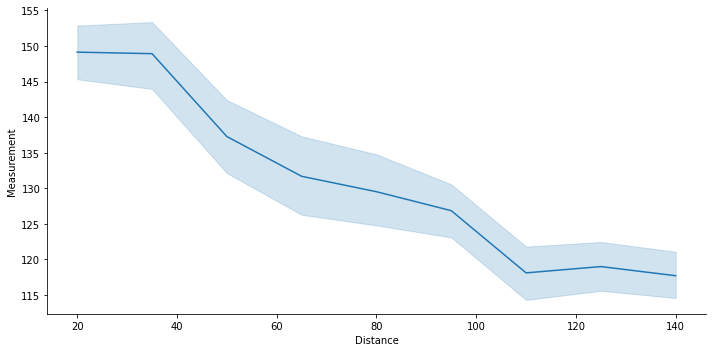

In [ ]:
#
# This example uses seaborn relplot() which will draw the mean and
# the 95% confidence interval of the data.
#
#
# Troubleshooting plot size (dimensions)
# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# https://drawingfromdata.com/pandas/seaborn/matplotlib/visualization/setting-figure-size-matplotlib-seaborn.html
#


# We will use the following Python libraries:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Path to where the results are hosted online
# This loads the data into a Pandas dataframe
Data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/PlottingGuidance/main/fictional_results.csv', sep=',')

# Macro to help with presenting the final plot.
%matplotlib inline


# This is the call creating the graph.
# data=Data       : source of data
# x='Distance'    : column label data to use on x axis
# y='Measurement' : column label data to use on y axis
# kind='line'     : make a line plot
# height=5        : size of the plot height
# aspect=2        : multiplier for width of plot from height
# ci=95           : confidence interval for shaded region
sns.relplot(data=Data, x='Distance', y='Measurement', kind='line', height=5, aspect=2, ci=95)

plt.show()

### Using a specific criteria within the set:

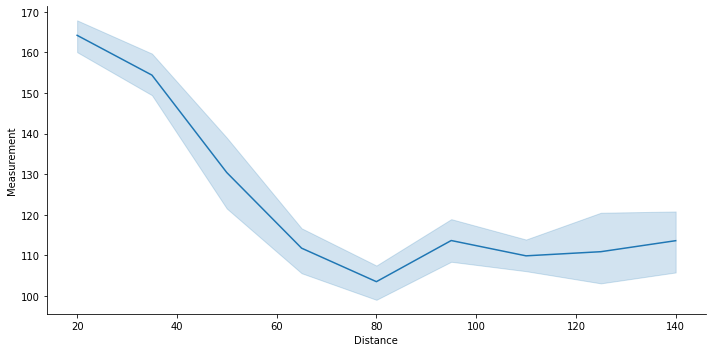

In [ ]:
#
# This example uses seaborn relplot() which will draw the mean and
# the 95% confidence interval of the data.
#
#
# Troubleshooting plot size (dimensions)
# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# https://drawingfromdata.com/pandas/seaborn/matplotlib/visualization/setting-figure-size-matplotlib-seaborn.html
#


# We will use the following Python libraries:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Path to where the results are hosted online
# This loads the data into a Pandas dataframe
Data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/PlottingGuidance/main/fictional_results.csv', sep=',')

# Macro to help with presenting the final plot.
%matplotlib inline

# Take a subset of all the data.
# Here, criteria is 'Angle' == 0, but you
# can change this to another value or even a range.
subset = Data[ (Data['Angle']==0) ]

# Other subset examples:
# Get all measurements for angles between 0 and 180
#subset = Data[ ( (Data['Angle'] == 0) & (Data['Angle'] <= 180) ) ]

# This is the call creating the graph.
# data=subset     : source of data (note, our new subset)
# x='Distance'    : column label data to use on x axis
# y='Measurement' : column label data to use on y axis
# kind='line'     : make a line plot
# height=5        : size of the plot height
# aspect=2        : multiplier for width of plot from height
# ci=95           : confidence interval for shaded region
sns.relplot(data=subset, x='Distance', y='Measurement', kind='line', height=5, aspect=2, ci=95)

plt.show()

### Plotting Multiple Lines from the Set

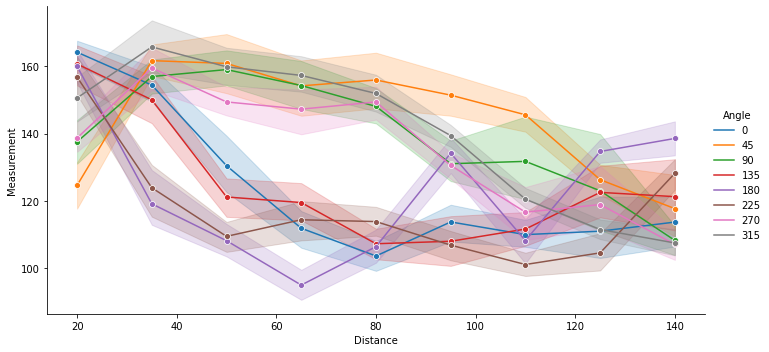

In [ ]:
#
# This example uses seaborn relplot() which will draw the mean and
# the 95% confidence interval of the data.
#
#
# Troubleshooting plot size (dimensions)
# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# https://drawingfromdata.com/pandas/seaborn/matplotlib/visualization/setting-figure-size-matplotlib-seaborn.html
#


# We will use the following Python libraries:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Path to where the results are hosted online
# This loads the data into a Pandas dataframe
Data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/PlottingGuidance/main/fictional_results.csv', sep=',')

# Macro to help with presenting the final plot.
%matplotlib inline



# Colours for the different categories was poor, solution:
# https://stackoverflow.com/questions/46173419/seaborn-change-color-according-to-hue-name
# Note, here we are using the unique values from 'Angle' to define the range and the
# number of colours mapped. For different data, you would need to adjust the column
# label 'Angle' to match the data you are going to be plotting.
colours = dict(zip(Data['Angle'].unique(), sns.color_palette(n_colors=len(Data['Angle'].unique()))))

# Arguments as previos examples, but:
# hue='Angle'     : tells the plot to split the data by 'Angle'.
# legend='full'   : ensure a full legend is displayed
# pallete=colours : our list of colours to use
# marker='o'      : add a dot to the data point locations
sns.relplot(data=Data, x='Distance', y='Measurement', hue='Angle', kind='line', height=5, aspect=2, ci=95, legend='full', palette=colours, marker='o')

plt.show()

### Line Plotting with Error Bars

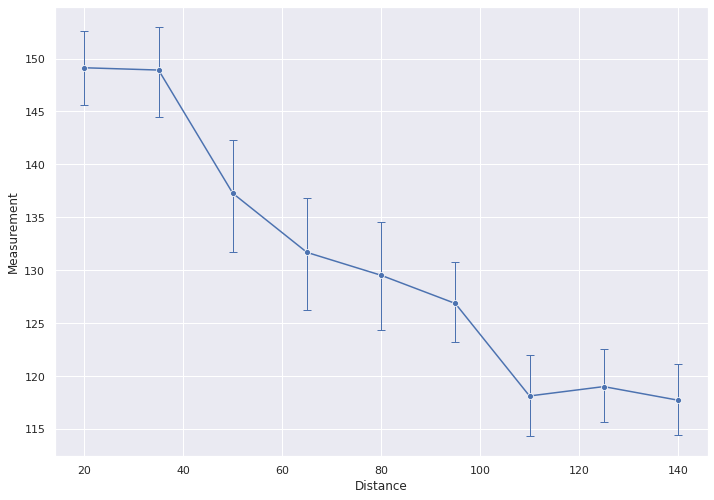

In [ ]:

#
# This example uses seaborn relplot() which will draw the mean and
# the 95% confidence interval of the data.
#


# We will use the following Python libraries:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Path to where the results are hosted online
# This loads the data into a Pandas dataframe
Data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/PlottingGuidance/main/fictional_results.csv', sep=',')

# Macro to help with presenting the final plot.
%matplotlib inline



# Colours for the different categories was poor, solution:
# https://stackoverflow.com/questions/46173419/seaborn-change-color-according-to-hue-name
# Note, here we are using the unique values from 'Angle' to define the range and the
# number of colours mapped. For different data, you would need to adjust the column
# label 'Angle' to match the data you are going to be plotting.
colours = dict(zip(Data['Angle'].unique(), sns.color_palette(n_colors=len(Data['Angle'].unique()))))

# Line plot seems to respond to a different method of
# setting the plot size:
# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Formating the error bars was annoying:
# https://stackoverflow.com/questions/53906229/set-the-capsize-in-seaborn-lineplot
sns.lineplot(data=Data, x='Distance', y='Measurement',  ci=95, err_style='bars', marker='o', err_kws={'capsize':4, 'elinewidth':1})

plt.show()


<br><br><br><br>

<a name="boxplots"></a>
## Box Plot Examples

Box plots are an extremely useful and informative way to present data.  If you are unsure about how to read a boxplot, there are plenty of <a href="https://www.youtube.com/watch?v=oBREri10ZHk">YouTube videos</a> on the subject.


### Using all available results data together:

Text(0.5, 1.0, 'Measurements for Each Distance from Obstacle')

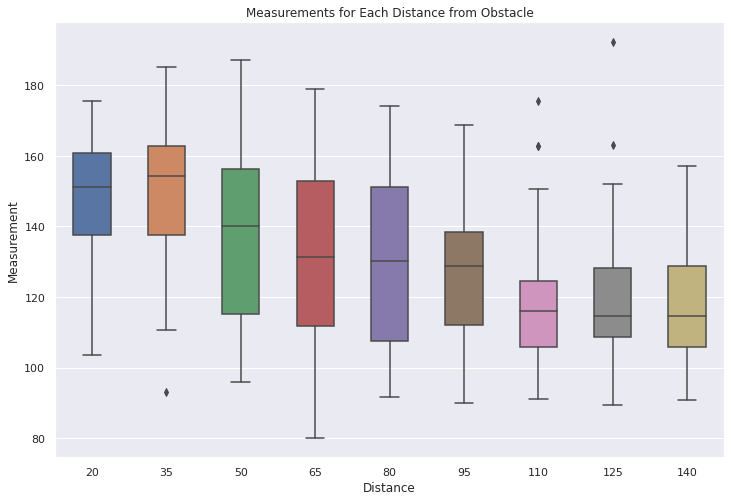

In [ ]:
# In this example, we use all available data to plot
# the measurements against the distance (to obstacle)
#
# This page was helpful:
# https://stackoverflow.com/questions/29219011/selecting-rows-based-on-multiple-column-values-in-pandas-dataframe
#

# We will use the following Python libraries:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Path to where the results are hosted online
# This loads the data into a Pandas dataframe
Data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/PlottingGuidance/main/fictional_results.csv', sep=',')

# Macro to help with presenting the final plot.
%matplotlib inline


# The following will produce a boxplot where each box collates
# (collects together) the measurements for all angles, at the
# distance intervals.
#
# Note that, we specify the data source for the plot with data=Data
# x axis set using the label column, 'Distance'
# y axis set using the label column, 'Measurement'
#

plt.figure(figsize=(12, 8))
bplot = sns.boxplot(y='Measurement', x='Distance', data=Data, width=0.5)
bplot.set_title('Measurements for Each Distance from Obstacle')

### Using a specific criteria within the set:

Text(0.5, 1.0, 'Measurements for Each Distance from Obstacle at Angle=0')

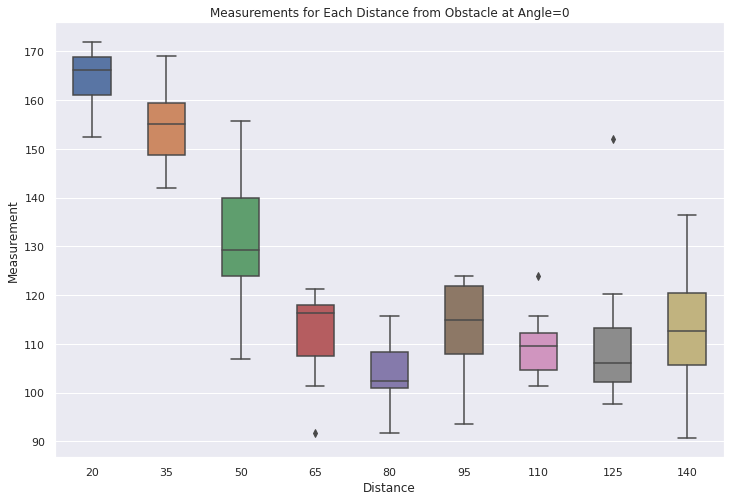

In [ ]:
# In this example, we first take a subset of the available
# results data by the criteria 'angle==0'.  We then plot all
# available measurement against distance (to obstacle) within
# this subset.

# We will use the following Python libraries:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Path to where the results are hosted online
# This loads the data into a Pandas dataframe
Data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/PlottingGuidance/main/fictional_results.csv', sep=',')

# Macro to help with presenting the final plot.
%matplotlib inline

# Take a subset of all the data.
# Here, criteria is 'Angle' == 0, but you
# can change this to another value or even a range.
subset = Data[ (Data['Angle']== 0) ]

# Other subset examples:
# Get all measurements for angles between 0 and 180
# subset = Data[ ( (Data['Angle'] >= 0) & (Data['Angle'] <= 180) ) ]


plt.figure(figsize=(12, 8))
bplot = sns.boxplot(y='Measurement', x='Distance', data=subset, width=0.5)
bplot.set_title('Measurements for Each Distance from Obstacle at Angle=0')

<br><br><br><br>

<a name="scatterplots"></a>
## Scatter Plot


### Scatter plot with trend line

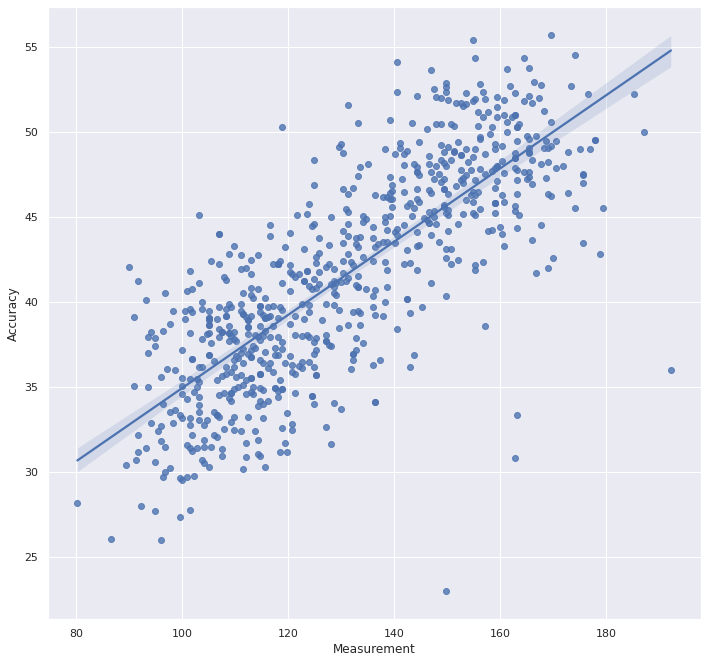

In [ ]:
# In this example, we will plot the sensor 'Measurement'
# against it's self-reported 'Accuracy' to see if there
# is a correlation.  This scatter plot will also place linear
# trend line with a 95% confidence interval.

# We will use the following Python libraries:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Path to where the results are hosted online
# This loads the data into a Pandas dataframe
Data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/PlottingGuidance/main/fictional_results.csv', sep=',')

# Macro to help with presenting the final plot.
%matplotlib inline

# Remember you can refine your results further
# by taking a subset by a criteria
#subset= Data[ (Data['Angle']==0)]

# Line plot seems to respond to a different method of
# setting the plot size:
# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
sns.set(rc={'figure.figsize':(11.7,11.27)})


sns.regplot( data=Data, x='Measurement', y='Accuracy', ci=95)

### Scatter plot of multiple data sets



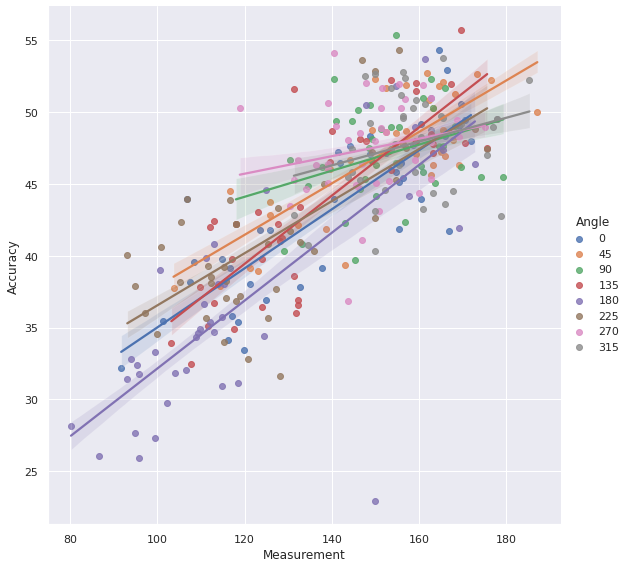

In [ ]:
# In this example, we will plot the sensor 'Measurement'
# against it's self-reported 'Accuracy', but seperate the
# data out by the criteria of 'angle'.

# We will use the following Python libraries:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Path to where the results are hosted online
# This loads the data into a Pandas dataframe
Data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/PlottingGuidance/main/fictional_results.csv', sep=',')

# Macro to help with presenting the final plot.
%matplotlib inline

subset = Data[ (Data['Distance'] < 80)]


# Colours for the different categories was poor, solution:
# https://stackoverflow.com/questions/46173419/seaborn-change-color-according-to-hue-name
# Note, here we are using the unique values from 'Angle' to define the range and the
# number of colours mapped. For different data, you would need to adjust the column
# label 'Angle' to match the data you are going to be plotting.
colours = dict(zip(subset['Angle'].unique(), sns.color_palette(n_colors=len(subset['Angle'].unique()))))

sns.lmplot( data=subset, x='Measurement', y='Accuracy', hue='Angle', ci=65, palette=colours, height=8, aspect=1, legend='full')

<br><br><br><br>

<a name="polarplots"></a>
## Polar Plot Examples

Polar plots are a little more complicated because the plot itself requires a fair amount of configuration.  

The following code cell will allow us to produce a plot which looks like the following:

<p align="center">
  <img src="https://github.com/paulodowd/PlottingGuidance/blob/main/images/polar_example.png?raw=true">
</p>

In the above, the dark blue line is the mean of our data and the shaded region is the standard deviation.

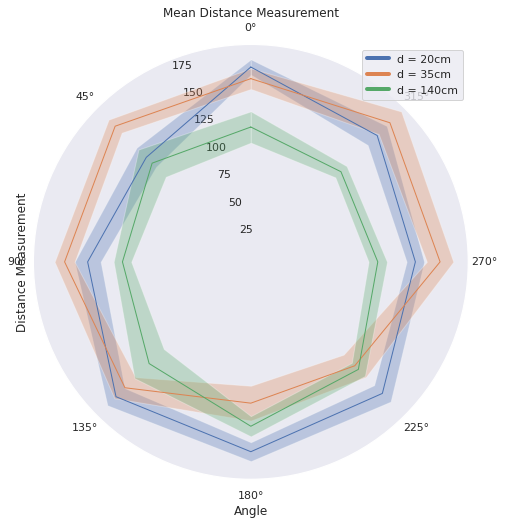

In [ ]:
#
# This Cell produces a polar plot of the distance measurements
# received at against objects at various distances.
#
# I found the following webpage useful:
# https://stackoverflow.com/questions/46750152/seaborn-polar-plot-how-to-change-degrees-in-the-facetgrid
#
#


# We will use the following Python libraries:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Path to where the results are hosted online
# This loads the data into a Pandas dataframe
Data=pd.read_csv('https://raw.githubusercontent.com/paulodowd/PlottingGuidance/main/fictional_results.csv', sep=',')

# Macro to help with presenting the final plot.
%matplotlib inline

# We have angles as degrees in our results csv
# Convert angles to radians for matplotlib
# Note, here we can apply a mathematical function
# to all data within the column labelled 'angle'
Data['Angle'] = Data['Angle'] * (np.pi/180.0)

# Set characteristics for our plot
plt.figure(figsize=(8, 8))        # how big to draw it?
ax = plt.axes(polar=True)         # type of plot
ax.set_theta_zero_location('N')   # set where 0 degrees faces
ax.grid(True)                     # add a grid to the plot

# We need to provide a list of axis lines for the polar plot
# We use np.linspace to create a short list of numbers
# You can inspect what this does by uncommenting the print()
# commands.
angles = np.linspace(0, 2*np.pi, 8, endpoint=False)
#print("Setting axis angles to:")
#print(angles)

ax.set_xticks( angles )           # Set the plot to use angles to
                                  # draw the axis lines locations.

# Set y axis label and plot title.
ax.set_ylabel('Distance Measurement')
ax.set_title("Mean Distance Measurement")



# This is a function, which means we can supply it with
# different ranges of data and it will draw onto our
# plot for us.  This is useful when we want to overlay
# different subsets of the data onto a single polar plot.
# We have to define the function before we can call it later.
#
# df:     dataframe of results data to use.
# label:  text to put in the plot legend.
#
def plot_with_error( df, label ):

  # This command will first ask the dataframe (data)
  # provided to this function to group itself by the
  # label 'Angle', and then take the mean of each
  # grouping.  This is returned as a list, which is
  # stored in mean_per_angle.
  #print("Means per angle")
  mean_per_angle = df.groupby( ['Angle'] ).mean()
  #print(mean_per_angle)


  # We have to append (copy) the 0 row to the end of
  # the data frame if we want the polar plot to link
  # the beginning of the line to the end of the line
  # We do this for the list of mean values we constructed.
  mean_per_angle = mean_per_angle.append( mean_per_angle.iloc[:1])

  # Here, we tell the dataframe to group data by the label
  # 'angle', and then to store the standard error of means
  # or the standard deviation (depending on which is commented
  # out or used next). This will be the distribution of our
  # results plot.
  #sem_per_angle = df.groupby(['Angle']).sem() # standard error of means?
  std_per_angle = df.groupby(['Angle']).std() # standard deviation?

  # We have to append (copy) the 0 row to the end of
  # the data frame if we want the polar plot to link
  # the beginning of the line to the end of the line.
  # We have to also do this for the error we have constructed.
  #sem_per_angle = sem_per_angle.append( sem_per_angle.iloc[:1])
  std_per_angle = std_per_angle.append( std_per_angle.iloc[:1])

  #print(mean_per_angle)
  #print(sem_per_angle)
  #print(std_per_angle)

  # As the means to plot themselves.
  mean_per_angle.plot(ax=ax, lw=1, y='Measurement', label=label)

  # Note, np.append adds a 0 to our list of angles to
  # again close the plotted line beginning to end.
  # We need a list of angles on the polar plot to match
  # the number of mean/error list items.
  # This command creates the shaded distribution region
  #ax.fill_between( np.append(angles,0), mean_per_angle['Measurement'] - sem_per_angle['Measurement'], mean_per_angle['Measurement'] + sem_per_angle['Measurement'], alpha=0.3 )
  ax.fill_between( np.append(angles,0), mean_per_angle['Measurement'] - std_per_angle['Measurement'], mean_per_angle['Measurement'] + std_per_angle['Measurement'], alpha=0.3 )

##### Function ends here ----x8


# Constructing the plot below!

# Take a subset of our total results, and send this to the
# above plotting function. Here, we select all results that
# are recorded at distance 20.  The polar plot will then
# present the results per angle within distance=20.
subset = Data[ (Data['Distance']==20) ]
label = "d = 20cm"
plot_with_error( subset, label )

subset = Data[ (Data['Distance']==35) ]
label = "d = 35cm"
plot_with_error( subset, label )

subset = Data[ (Data['Distance']==140) ]
label = "d = 140cm"
plot_with_error( subset, label )



# Comment out the above 3 blocks, and uncomment the below
# if you want to see a polar plot with all data
# plotted and a legend by using a for() loop

#distances = np.linspace(20, 140, num=9)
#for d in distances:
#  label = "d = " + str(d)
#  subset = Data[ (Data['Distance']==d) ]
#  print(subset)
#  plot_with_error( subset, label )




# The legend was printing very small, so a
# quick fix for that.
leg = ax.legend()
for line in leg.get_lines():
  line.set_linewidth(4.0)

# Finally, show the grid, and
# show the final plot
plt.grid()
plt.show()


